In [1]:
"""
Author: Josephine
Title: Mini Project of Text Analytics
Aug 2021
"""

# import needed packages 
import pandas as pd
import numpy as np
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist, SnowballStemmer
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/josephine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# load text file
osha=pd.read_table(r'osha.txt',sep='\t',header = None)

# Data understanding and exploration

In [4]:
# how many records and variables?
osha.shape

(10000, 3)

In [5]:
# first few records
osha.head(5)

0                                                  1  \
0  201079928     Employee Is Burned By Forklift Radiator Fluid    
1  202561825   Employee Falls From Flatbed Trailer And Later...   
2  200361855   Two Workers Are Struck By Motor Vehicle And O...   
3  200361863    Employee Is Struck By Bales Of Wire And Killed    
4  201079324   Employee Is Splashed With Hot Water And Is Bu...   

                                                   2  
0   At approximately 11:30 a.m. on November 13  2...  
1   On August 30  2013  Employee #1 was working f...  
2   On August 27  2013  Employees #1 and #2  of T...  
3   On August 26  2013  Employee #1  with Lee Iro...  
4   On July 14  2013  Employee #1  vacuum pump tr...

In [6]:
# tokenize reports column
for i in np.arange(len(osha[1])):
    tokens = word_tokenize(osha.iloc[i,2])
    osha.loc[i,'report_tokenscnt'] = len(tokens)
osha.head()

0                                                  1  \
0  201079928     Employee Is Burned By Forklift Radiator Fluid    
1  202561825   Employee Falls From Flatbed Trailer And Later...   
2  200361855   Two Workers Are Struck By Motor Vehicle And O...   
3  200361863    Employee Is Struck By Bales Of Wire And Killed    
4  201079324   Employee Is Splashed With Hot Water And Is Bu...   

                                                   2  report_tokenscnt  
0   At approximately 11:30 a.m. on November 13  2...             257.0  
1   On August 30  2013  Employee #1 was working f...              57.0  
2   On August 27  2013  Employees #1 and #2  of T...             133.0  
3   On August 26  2013  Employee #1  with Lee Iro...             302.0  
4   On July 14  2013  Employee #1  vacuum pump tr...             295.0

In [7]:
# longest report tokens
osha['report_tokenscnt'].max()

804.0

In [8]:
# 3-word long report tokens
osha[osha['report_tokenscnt']==3][2].unique()

array(['InspectionOpen DateSICEstablishment Name'], dtype=object)

In [9]:
# pre-processing titles 

def pre_process(text):
    porter = nltk.PorterStemmer()
    stop = stopwords.words('english')

    tokens1=nltk.word_tokenize(text)
    tokens1=[ porter.stem(t.lower()) for t in tokens1] 
    tokens1=[ t for t in tokens1 if t not in string.punctuation ]
    tokens1=[ t for t in tokens1 if t not in stop]
    return(tokens1)

titles = osha[1]
titles_toks = titles.apply(pre_process)
titles_toks

0               [employe, burn, forklift, radiat, fluid]
1            [employe, fall, flatb, trailer, later, die]
2        [two, worker, struck, motor, vehicl, one, kill]
3                    [employe, struck, bale, wire, kill]
4                    [employe, splash, hot, water, burn]
                              ...                       
9995         [employe, kill, run, hot, metal, rail, car]
9996                       [employe, injur, flash, fire]
9997                             [employe, kill, struck]
9998    [employe, 's, arm, amput, caught, locomot, gear]
9999                    [employe, kill, struck, locomot]
Name: 1, Length: 10000, dtype: object

In [10]:
# top 5 common tokens

titles_toks_flat = [ c for l in titles_toks for c in l ]
FreqDist(titles_toks_flat).most_common(5)

[('employe', 7835),
 ('kill', 2139),
 ('fall', 2114),
 ('injur', 1724),
 ('struck', 1151)]

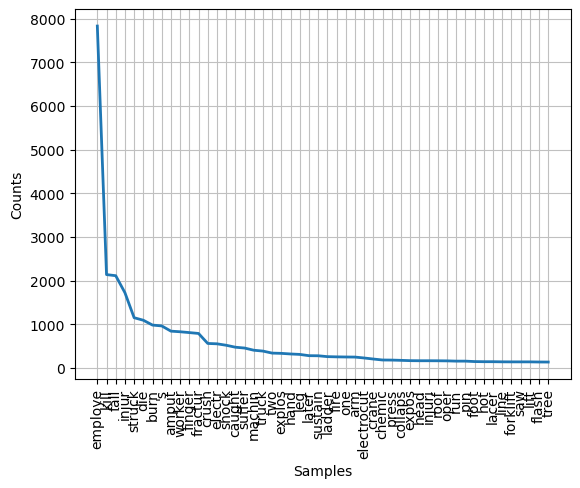

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
# plot the frequency distribution
FreqDist(titles_toks_flat).plot(50)

In [12]:
# any 1-word long title?
min(map(len,titles_toks_flat))

1

# Q1. What are the major types of accidents reflected in the reports? & Q2. Which type of accidents has more occurrences?

In [13]:
## Topic modelling for titles

# packages importing 
import logging
import gensim 
from gensim import corpora

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [14]:
# Filter off any words with document frequency less than 2, or appearing in more than 90% documents
titles_dict = corpora.Dictionary(titles_toks)
print(titles_dict)
titles_dict.filter_extremes(no_below=2, no_above=0.9)
print(titles_dict)

2021-08-13 16:39:22,225 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-08-13 16:39:22,318 : INFO : built Dictionary(2829 unique tokens: ['burn', 'employe', 'fluid', 'forklift', 'radiat']...) from 10000 documents (total 52995 corpus positions)
2021-08-13 16:39:22,342 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(2829 unique tokens: ['burn', 'employe', 'fluid', 'forklift', 'radiat']...) from 10000 documents (total 52995 corpus positions)", 'datetime': '2021-08-13T16:39:22.318700', 'gensim': '4.0.1', 'python': '3.8.11 (default, Aug  6 2021, 08:56:27) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2021-08-13 16:39:22,346 : INFO : discarding 1172 tokens: [('wir', 1), ('penetr', 1), ('beet', 1), ('aval', 1), ('setter', 1), ('contusions/abras', 1), ('adbras', 1), ('sabar', 1), ('iburn', 1), ('fiber', 1)]...
2021-08-13 16:39:22,347 : INFO : keeping 1657 tokens which were in no less than 2 and no more than 9000 (=90.0%) 

Dictionary(2829 unique tokens: ['burn', 'employe', 'fluid', 'forklift', 'radiat']...)
Dictionary(1657 unique tokens: ['burn', 'employe', 'fluid', 'forklift', 'radiat']...)


In [15]:
# use dictionary to create a DTM
titles_dtm = [titles_dict.doc2bow(d) for d in titles_toks]

In [16]:
# lda model 
# try different topic numbers
titles_lda = gensim.models.ldamodel.LdaModel(titles_dtm, num_topics = 6, id2word = titles_dict, passes=20, chunksize=128, random_state=10)
titles_lda.show_topics(10)

2021-08-13 16:39:28,882 : INFO : using symmetric alpha at 0.16666666666666666
2021-08-13 16:39:28,885 : INFO : using symmetric eta at 0.16666666666666666
2021-08-13 16:39:28,888 : INFO : using serial LDA version on this node
2021-08-13 16:39:28,892 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 10000 documents, updating model once every 128 documents, evaluating perplexity every 1280 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-13 16:39:28,892 : INFO : PROGRESS: pass 0, at document #128/10000
2021-08-13 16:39:28,934 : INFO : merging changes from 128 documents into a model of 10000 documents
2021-08-13 16:39:28,936 : INFO : topic #4 (0.167): 0.119*"employe" + 0.073*"crush" + 0.058*"fractur" + 0.044*"suffer" + 0.043*"fall" + 0.029*"'s" + 0.029*"cut" + 0.029*"forklift" + 0.029*"break" + 0.015*"worker"
2021-08-13 16:39:28,936 : INFO : topic #1 (0.167): 0.098*"employe" + 0.049*"injur" + 0.049*"burn" + 0.049*"wo

[(0,
  '0.191*"employe" + 0.124*"kill" + 0.111*"struck" + 0.081*"injur" + 0.067*"fall" + 0.034*"truck" + 0.020*"car" + 0.013*"tree" + 0.012*"chemic" + 0.011*"explod"'),
 (1,
  '0.158*"employe" + 0.128*"burn" + 0.043*"run" + 0.035*"suffer" + 0.033*"hot" + 0.024*"electrocut" + 0.024*"flash" + 0.021*"metal" + 0.018*"expos" + 0.018*"worker"'),
 (2,
  '0.176*"employe" + 0.155*"die" + 0.040*"later" + 0.036*"explos" + 0.030*"pin" + 0.027*"two" + 0.027*"injur" + 0.023*"dure" + 0.022*"tank" + 0.018*"crane"'),
 (3,
  '0.076*"employe" + 0.061*"injur" + 0.058*"electr" + 0.057*"shock" + 0.045*"kill" + 0.043*"locomot" + 0.035*"fire" + 0.030*"sustain" + 0.029*"arm" + 0.029*"one"'),
 (4,
  '0.140*"employe" + 0.122*"fall" + 0.084*"fractur" + 0.071*"crush" + 0.046*"kill" + 0.038*"leg" + 0.030*"ladder" + 0.029*"\'s" + 0.026*"worker" + 0.025*"train"'),
 (5,
  '0.159*"employe" + 0.107*"amput" + 0.096*"\'s" + 0.096*"finger" + 0.049*"caught" + 0.048*"machin" + 0.031*"hand" + 0.024*"press" + 0.012*"worker" + 

In [17]:
# Evaluate the coherence score of LDA models

from gensim.models.coherencemodel import CoherenceModel

cm_umass = CoherenceModel(titles_lda, dictionary=titles_dict, corpus=titles_dtm, coherence='u_mass')
cm_cv = CoherenceModel(titles_lda, dictionary=titles_dict, texts=titles_toks, coherence='c_v')
lda_umass = cm_umass.get_coherence()
lda_cv = cm_cv.get_coherence()
print(lda_umass)
print(lda_cv)
# similar coherence score for topics = 5,6,7,8

2021-08-13 16:39:59,901 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-08-13 16:39:59,905 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2021-08-13 16:39:59,908 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2021-08-13 16:39:59,912 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2021-08-13 16:39:59,917 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2021-08-13 16:39:59,921 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2021-08-13 16:39:59,924 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2021-08-13 16:39:59,928 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2021-08-13 16:39:59,931 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2021-08-13 16:39:59,934 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2021-08-13 16:39:59,943 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estim

-10.295309651265113
0.40775793408983935


In [18]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

In [19]:
# visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(titles_lda, titles_dtm, titles_dict)
pyLDAvis.display(LDAvis_prepared)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [24]:
accidents = {0: 'truck', 
             1: 'amputate', 
             2: 'ladder', 
             3: 'electric shock', 
             4: 'burn',
             5: 'explosion'}

In [22]:
# Get the topic distribution of reports
topics = titles_lda.get_document_topics(titles_dtm)

from operator import itemgetter
#show the topic distributions for the first 5 reports, 
for i in range(0, 5):
    print(topics[i])
    print(max(topics[i], key=itemgetter(1))[0]) 

[(0, 0.24126372), (1, 0.44904715), (2, 0.027863009), (3, 0.027817272), (4, 0.22615334), (5, 0.027855465)]
1
[(0, 0.5429899), (1, 0.023853665), (2, 0.36147422), (3, 0.023832116), (4, 0.023996267), (5, 0.0238538)]
0
[(0, 0.38582832), (1, 0.020893948), (2, 0.020920755), (3, 0.5305386), (4, 0.020942876), (5, 0.020875493)]
3
[(0, 0.86081696), (1, 0.027832102), (2, 0.02783825), (3, 0.027827855), (4, 0.027852383), (5, 0.027832447)]
0
[(0, 0.45408317), (1, 0.4345839), (2, 0.027848672), (3, 0.0278084), (4, 0.027834177), (5, 0.027841702)]
0


In [25]:
# Select the best topic (with highest score) for each report
top_topic = [ max(t, key=itemgetter(1))[0] for t in topics ]

topics_perRep = [ accidents[t] for t in top_topic ]
print (topics_perRep)

['amputate', 'truck', 'electric shock', 'truck', 'truck', 'amputate', 'explosion', 'burn', 'electric shock', 'burn', 'explosion', 'electric shock', 'truck', 'ladder', 'electric shock', 'explosion', 'amputate', 'truck', 'truck', 'electric shock', 'truck', 'burn', 'truck', 'burn', 'electric shock', 'burn', 'explosion', 'electric shock', 'burn', 'truck', 'electric shock', 'burn', 'electric shock', 'burn', 'truck', 'electric shock', 'explosion', 'electric shock', 'truck', 'electric shock', 'explosion', 'explosion', 'explosion', 'explosion', 'electric shock', 'truck', 'truck', 'explosion', 'electric shock', 'ladder', 'explosion', 'burn', 'burn', 'electric shock', 'burn', 'ladder', 'truck', 'ladder', 'explosion', 'truck', 'explosion', 'ladder', 'electric shock', 'explosion', 'burn', 'explosion', 'explosion', 'explosion', 'burn', 'electric shock', 'truck', 'explosion', 'electric shock', 'electric shock', 'truck', 'explosion', 'burn', 'explosion', 'electric shock', 'electric shock', 'burn', 'b

In [26]:
# How many report in each topic?
labels, counts = np.unique(topics_perRep, return_counts=True)
print (labels)
print (counts)

['amputate' 'burn' 'electric shock' 'explosion' 'ladder' 'truck']
[1330 1766 1263 1682 1310 2649]


# Q3. Which part of the human body is injured most?

In [27]:
# import packages
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to /Users/josephine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/josephine/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/josephine/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
reports = osha[2]
type(reports)

## pre-processing 
# POS tagging 

sent_pos = [ pos_tag(word_tokenize(s), tagset = 'universal') for s in reports ]
sent_pos

[[('At', 'ADP'),
  ('approximately', 'ADV'),
  ('11:30', 'NUM'),
  ('a.m.', 'ADV'),
  ('on', 'ADP'),
  ('November', 'NOUN'),
  ('13', 'NUM'),
  ('2013', 'NUM'),
  ('Employee', 'NOUN'),
  ('#', '.'),
  ('1', 'NUM'),
  ('with', 'ADP'),
  ('Edco', 'NOUN'),
  ('Waste', 'NOUN'),
  ('&', 'CONJ'),
  ('Recycling', 'NOUN'),
  ('Services', 'NOUN'),
  ('was', 'VERB'),
  ('operating', 'VERB'),
  ('a', 'DET'),
  ('forklift', 'NOUN'),
  ('(', '.'),
  ('Linde', 'NOUN'),
  ('Lift', 'NOUN'),
  ('Truck', 'NOUN'),
  (';', '.'),
  ('Serial', 'ADJ'),
  ('Number', 'NOUN'),
  (':', '.'),
  ('H2X393S04578', 'NOUN'),
  (';', '.'),
  ('identified', 'VERB'),
  ('by', 'ADP'),
  ('the', 'DET'),
  ('employer', 'NOUN'),
  ('as', 'ADP'),
  ('FL-3', 'NOUN'),
  (')', '.'),
  ('from', 'ADP'),
  ('approximately', 'ADV'),
  ('4:00', 'NUM'),
  ('a.m.', 'ADV'),
  ('moving', 'VERB'),
  ('bales', 'NOUN'),
  ('of', 'ADP'),
  ('recyclable', 'ADJ'),
  ('paper', 'NOUN'),
  ('products', 'NOUN'),
  ('from', 'ADP'),
  ('a', 'DET'),


In [29]:
# lemmatization

def lem(wpos):
    wnl = nltk.WordNetLemmatizer()
    
    lemmas = []
    for w,pos in wpos:
        if pos == 'NOUN':
            lemmas.append(wnl.lemmatize(w.lower()))
    return lemmas

In [30]:
sent_lem = [ lem(wpos) for wpos in sent_pos ]
sent_lem

[['november',
  'employee',
  'edco',
  'waste',
  'recycling',
  'service',
  'forklift',
  'linde',
  'lift',
  'truck',
  'number',
  'h2x393s04578',
  'employer',
  'fl-3',
  'bale',
  'paper',
  'product',
  'collection',
  'area',
  'yard',
  'truck',
  'employee',
  'air',
  'filter',
  'fl-3',
  'air',
  'filter',
  'employee',
  'fl-3',
  'doorway',
  'maintenance',
  'building',
  'air',
  'filter',
  'rear',
  'forklift',
  'cab',
  'frame',
  'driver',
  'side',
  'employee',
  'air',
  'filter',
  'back',
  'forklift',
  'back',
  'forklift',
  'employee',
  'foot',
  'cooling',
  'system',
  'radiator',
  'cap',
  'fluid',
  'truck',
  'cooling',
  'system',
  'pressure',
  'morning',
  'fluid',
  'reservoir',
  'employee',
  'leg',
  'area',
  'employee',
  'back',
  'forklift',
  'ground',
  'coworkers',
  'assistance',
  'emergency',
  'service',
  'employee',
  'burn',
  'center',
  'hour',
  'treatment',
  'degree',
  'burn',
  'leg',
  'area'],
 ['august',
  'employ

In [31]:
# get document frequency

unique = [set(sent) for sent in sent_lem]

noun_set = []
for s in unique:
    for nouns in s:
        noun_set.append(nouns)
noun_set

['h2x393s04578',
 'fl-3',
 'number',
 'recycling',
 'frame',
 'burn',
 'truck',
 'november',
 'assistance',
 'employee',
 'morning',
 'paper',
 'service',
 'pressure',
 'system',
 'forklift',
 'area',
 'cooling',
 'degree',
 'yard',
 'coworkers',
 'driver',
 'back',
 'foot',
 'hour',
 'radiator',
 'ground',
 'rear',
 'air',
 'employer',
 'emergency',
 'lift',
 'edco',
 'building',
 'doorway',
 'waste',
 'center',
 'treatment',
 'linde',
 'filter',
 'collection',
 'bale',
 'cap',
 'product',
 'fluid',
 'side',
 'cab',
 'leg',
 'reservoir',
 'maintenance',
 'abdomen',
 'ground',
 'august',
 'fall',
 'inch',
 'height',
 'injury',
 'trailer',
 'employee',
 'death',
 'company',
 'speed',
 'templar',
 'duty',
 'a',
 'employee',
 'construction',
 'bruise',
 'service',
 'august',
 'installation',
 'line',
 'scene',
 'vehicle',
 'mile',
 'hour',
 'struck',
 'lane',
 'highway',
 'location',
 'turn',
 'fiber',
 'emergency',
 'limit',
 'flagger',
 'treatment',
 'inc.',
 'worker',
 'right',
 'compa

In [32]:
stop = stopwords.words('english')+['could', 'would']

noun_clean = [ w for w in noun_set if w not in stop]
noun_clean

['h2x393s04578',
 'fl-3',
 'number',
 'recycling',
 'frame',
 'burn',
 'truck',
 'november',
 'assistance',
 'employee',
 'morning',
 'paper',
 'service',
 'pressure',
 'system',
 'forklift',
 'area',
 'cooling',
 'degree',
 'yard',
 'coworkers',
 'driver',
 'back',
 'foot',
 'hour',
 'radiator',
 'ground',
 'rear',
 'air',
 'employer',
 'emergency',
 'lift',
 'edco',
 'building',
 'doorway',
 'waste',
 'center',
 'treatment',
 'linde',
 'filter',
 'collection',
 'bale',
 'cap',
 'product',
 'fluid',
 'side',
 'cab',
 'leg',
 'reservoir',
 'maintenance',
 'abdomen',
 'ground',
 'august',
 'fall',
 'inch',
 'height',
 'injury',
 'trailer',
 'employee',
 'death',
 'company',
 'speed',
 'templar',
 'duty',
 'employee',
 'construction',
 'bruise',
 'service',
 'august',
 'installation',
 'line',
 'scene',
 'vehicle',
 'mile',
 'hour',
 'struck',
 'lane',
 'highway',
 'location',
 'turn',
 'fiber',
 'emergency',
 'limit',
 'flagger',
 'treatment',
 'inc.',
 'worker',
 'right',
 'company',
 

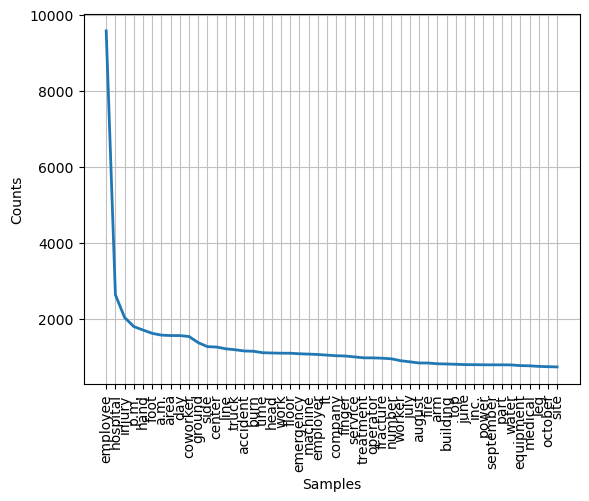

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
# frequency distribution 
FreqDist(noun_clean).plot(50)

In [34]:
# get the list of body terms 
ss = wn.synsets('body_part')[0]
print(ss)

hyps = list(set(
                [w for s in ss.closure(lambda s:s.hyponyms())
                        for w in s.lemma_names()]))  
sorted(hyps)

Synset('body_part.n.01')


/opt/anaconda3/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('lip.n.01') at depth 4
  for synset in acyclic_breadth_first(self, rel, depth):
/opt/anaconda3/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('tongue.n.01') at depth 4
  for synset in acyclic_breadth_first(self, rel, depth):
/opt/anaconda3/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('umbilical_cord.n.01') at depth 4
  for synset in acyclic_breadth_first(self, rel, depth):
/opt/anaconda3/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('diaphragm.n.02') at depth 4
  for synset in acyclic_breadth_first(self, rel, depth):
/opt/anaconda3/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('umbilical_cord

['ANS',
 'Achilles_tendon',
 "Adam's_apple",
 "Bartholin's_gland",
 "Bowman's_capsule",
 "Broca's_area",
 "Broca's_center",
 "Broca's_convolution",
 "Broca's_gyrus",
 "Brodmann's_area",
 "Brodmann's_area_17",
 'CNS',
 "Cowper's_gland",
 'Eustachian_tube',
 'Fallopian_tube',
 'GI_tract',
 'Golgi_apparatus',
 'Golgi_body',
 'Golgi_complex',
 'Graafian_follicle',
 'Haversian_canal',
 "Luschka's_tonsil",
 'MPS',
 'Meibomian_gland',
 "Montgomery's_tubercle",
 'OD',
 'OS',
 "Peter's_gland",
 "Peyer's_patch",
 "Purkinje's_system",
 "Purkinje's_tissue",
 'Purkinje_fiber',
 'Purkinje_network',
 'RES',
 "Rolando's_area",
 "Rolando's_fissure",
 'Roman_nose',
 'SA_node',
 "Schlemm's_canal",
 'Sylvian_aqueduct',
 'Sylvian_fissure',
 "Wernicke's_area",
 "Wernicke's_center",
 'Wormian_bone',
 'ab',
 'abdomen',
 'abdominal',
 'abdominal_aorta',
 'abdominal_cavity',
 'abdominal_external_oblique_muscle',
 'abdominal_muscle',
 'abdominal_nerve_plexus',
 'abducens',
 'abducens_muscle',
 'abducens_nerve',


In [35]:
# document frequencies for body terms

bp=[]
for t in noun_clean:
    if t in hyps:
        bp.append(t)
        
bp

['frame',
 'system',
 'area',
 'back',
 'foot',
 'rear',
 'center',
 'side',
 'leg',
 'abdomen',
 'right',
 'head',
 'abdomen',
 'face',
 'area',
 'torso',
 'column',
 'side',
 'leg',
 'abdomen',
 'center',
 'valve',
 'shoulder',
 'leg',
 'chest',
 'abdomen',
 'area',
 'arm',
 'abdomen',
 'abdomen',
 'area',
 'abdomen',
 'hole',
 'blade',
 'hood',
 'center',
 'head',
 'abdomen',
 'area',
 'back',
 'abdomen',
 'blade',
 'body',
 'butt',
 'abdomen',
 'area',
 'back',
 'chest',
 'side',
 'bristle',
 'abdomen',
 'pad',
 'groin',
 'area',
 'buttock',
 'apparatus',
 'blade',
 'abdomen',
 'nail',
 'center',
 'abdomen',
 'area',
 'side',
 'foot',
 'back',
 'neck',
 'knee',
 'ankle',
 'foot',
 'rear',
 'hand',
 'leg',
 'face',
 'foot',
 'corporation',
 'leg',
 'vessel',
 'leg',
 'temple',
 'face',
 'face',
 'foot',
 'arm',
 'side',
 'foot',
 'side',
 'horn',
 'knee',
 'pit',
 'hole',
 'center',
 'side',
 'foot',
 'rib',
 'hand',
 'shoulder',
 'bone',
 'finger',
 'center',
 'left',
 'foot',
 'le

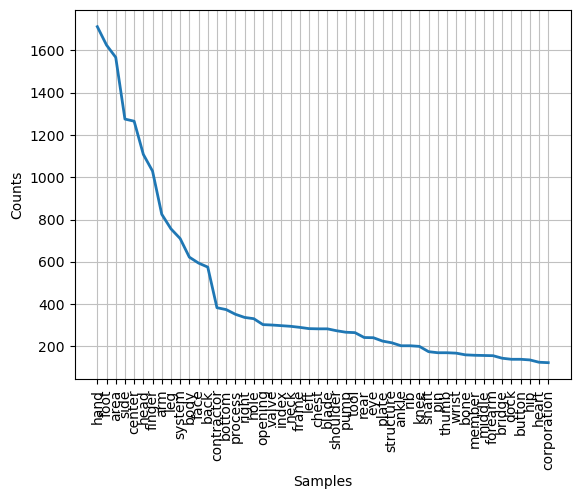

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
# visualize
FreqDist(bp).plot(50)

# Q4. What are the more risky occupations involved in such accidents?

In [38]:
# get the list of occupation terms 
ss1 = wn.synsets('occupation')[0]
print(ss1)

hyps1 = list(set(
                [w for s in ss1.closure(lambda s:s.hyponyms())
                        for w in s.lemma_names()]))  

sorted(hyps1)

Synset('occupation.n.01')


['Agriculture_Secretary',
 'Attorney_General',
 'Attorney_General_of_the_United_States',
 'Chief_Executive',
 'Commerce_Secretary',
 'Defense_Secretary',
 'Education_Secretary',
 'Energy_Secretary',
 'FIFO',
 'French_lesson',
 'German_lesson',
 'Hebrew_lesson',
 'Interior_Secretary',
 'LIFO',
 'Labor_Secretary',
 'Navy_Secretary',
 'President',
 'President_of_the_United_States',
 'Secretary_of_Agriculture',
 'Secretary_of_Commerce',
 'Secretary_of_Commerce_and_Labor',
 'Secretary_of_Defense',
 'Secretary_of_Education',
 'Secretary_of_Energy',
 'Secretary_of_Health_Education_and_Welfare',
 'Secretary_of_Health_and_Human_Services',
 'Secretary_of_Housing_and_Urban_Development',
 'Secretary_of_Labor',
 'Secretary_of_State',
 'Secretary_of_Transportation',
 'Secretary_of_Veterans_Affairs',
 'Secretary_of_War',
 'Secretary_of_the_Interior',
 'Secretary_of_the_Navy',
 'Secretary_of_the_Treasury',
 'Transportation_Secretary',
 'Treasury_Secretary',
 'War_Secretary',
 'academicianship',
 'acco

In [43]:
# document frequency
ocu=[]
for t in noun_clean:
    if t in hyps1 and t not in ['work','position','place','office']:
        ocu.append(t)
        
ocu

['service',
 'service',
 'plumbing',
 'carpentry',
 'carpentry',
 'service',
 'service',
 'service',
 'service',
 'walk',
 'service',
 'service',
 'situation',
 'service',
 'engagement',
 'situation',
 'engagement',
 'service',
 'engineering',
 'service',
 'service',
 'plumbing',
 'spot',
 'land',
 'instruction',
 'service',
 'medicine',
 'medicine',
 'roofing',
 'service',
 'service',
 'service',
 'service',
 'medium',
 'trade',
 'instruction',
 'lighting',
 'service',
 'service',
 'trade',
 'painting',
 'service',
 'carpentry',
 'service',
 'painting',
 'instruction',
 'service',
 'carpentry',
 'service',
 'masonry',
 'medium',
 'service',
 'service',
 'service',
 'service',
 'farming',
 'service',
 'service',
 'service',
 'engineering',
 'plumbing',
 'service',
 'service',
 'service',
 'service',
 'plumbing',
 'service',
 'service',
 'service',
 'service',
 'service',
 'specialty',
 'service',
 'service',
 'spot',
 'service',
 'craft',
 'painting',
 'service',
 'service',
 'service'

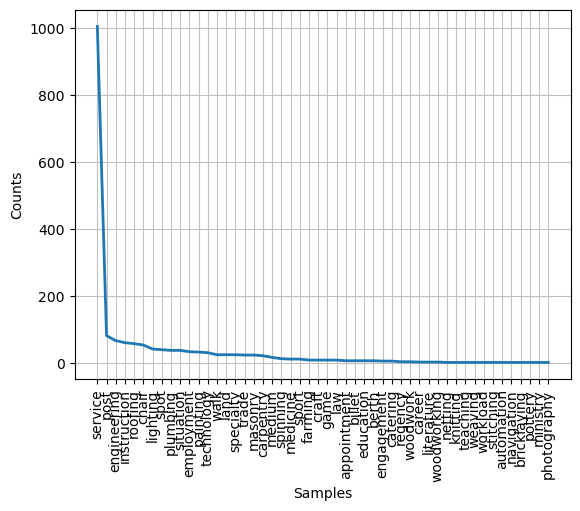

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
# visualize
FreqDist(ocu).plot(50)